In [1]:
#Basic libraries
import numpy as np
import pandas as pd
#visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns


In [2]:
#Evalutation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
#Deep Learning Libraries
import tensorflow as tf
import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [4]:
fashion_train=pd.read_csv("fashion-mnist_train.csv")
fashion_test=pd.read_csv("fashion-mnist_test.csv")

In [5]:
fashion_train.shape

(60000, 785)

In [6]:
X_train_fashion = fashion_train.drop('label',axis=1)
y_train_fashion = fashion_train ['label']
X_test_fashion = fashion_test.drop('label',axis=1)
y_test_fashion = fashion_test ['label']
#only input and only output

In [7]:
#reshaping the dataset
x_train_reshape=X_train_fashion.values.reshape(-1,28,28)
x_test_reshape= X_train_fashion.values.reshape(-1,28,28)

In [8]:
#Names of the clothing in order
col_name=['T-Shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

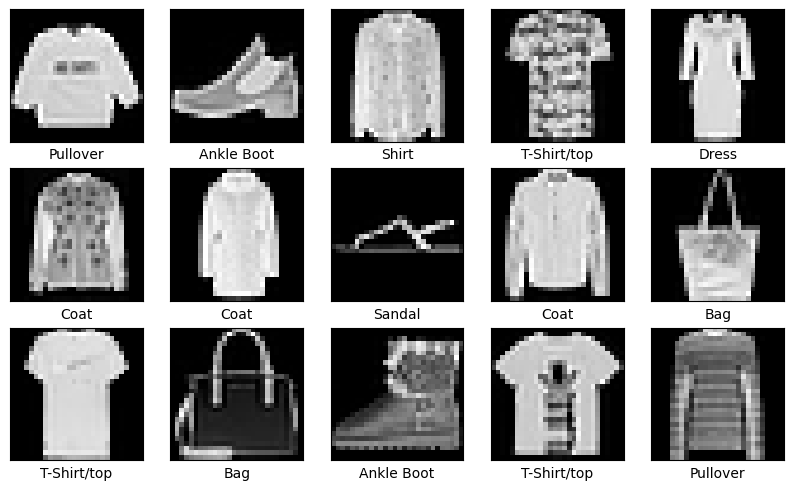

In [9]:
#Visualizing the image
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i],cmap='gray')
    plt.xlabel(col_name[y_train_fashion[i]])
plt.show()

In [10]:
#One-Hot Encoding

y_train_fashion=to_categorical(y_train_fashion, num_classes=10)
y_test_fashion=to_categorical(y_test_fashion, num_classes=10)


In [11]:
#creating base neural network

model=keras.Sequential([
    layers.Dense(128,activation='relu',input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'),])

In [12]:
#compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [13]:
#Fitting the model
history=model.fit(X_train_fashion,y_train_fashion, batch_size=100, epochs=30, validation_data=(X_test_fashion, y_test_fashion))

Epoch 1/30
600/600 [==============================] - 18s 13ms/step - loss: 1.1106 - accuracy: 0.6241 - val_loss: 0.5394 - val_accuracy: 0.8162
Epoch 2/30
600/600 [==============================] - 5s 9ms/step - loss: 0.7305 - accuracy: 0.7528 - val_loss: 0.4838 - val_accuracy: 0.8424
Epoch 3/30
600/600 [==============================] - 5s 9ms/step - loss: 0.6656 - accuracy: 0.7747 - val_loss: 0.4596 - val_accuracy: 0.8404
Epoch 4/30
600/600 [==============================] - 6s 10ms/step - loss: 0.6288 - accuracy: 0.7863 - val_loss: 0.4300 - val_accuracy: 0.8544
Epoch 5/30
600/600 [==============================] - 6s 9ms/step - loss: 0.6109 - accuracy: 0.7942 - val_loss: 0.4237 - val_accuracy: 0.8545
Epoch 6/30
600/600 [==============================] - 5s 9ms/step - loss: 0.5920 - accuracy: 0.8001 - val_loss: 0.4598 - val_accuracy: 0.8497
Epoch 7/30
600/600 [==============================] - 9s 15ms/step - loss: 0.5840 - accuracy: 0.8053 - val_loss: 0.4146 - val_accuracy: 0.8674
Ep

In [14]:
test_loss_fashion, test_acc_fashion=model.evaluate(X_test_fashion, y_test_fashion)

313/313 [==============================] - 4s 4ms/step - loss: 0.3718 - accuracy: 0.8726


In [15]:
print('Fashion MNIST Test Accuracy:', round (test_acc_fashion,4))

Fashion MNIST Test Accuracy: 0.8726


In [16]:
#Predicting the labels-Fashion
y_predict_fash=model.predict(X_test_fashion)
y_predict_fash=np.argmax(y_predict_fash,axis=1)
y_test_fash_eval=np.argmax(y_test_fashion,axis=1)


313/313 [==============================] - 3s 5ms/step


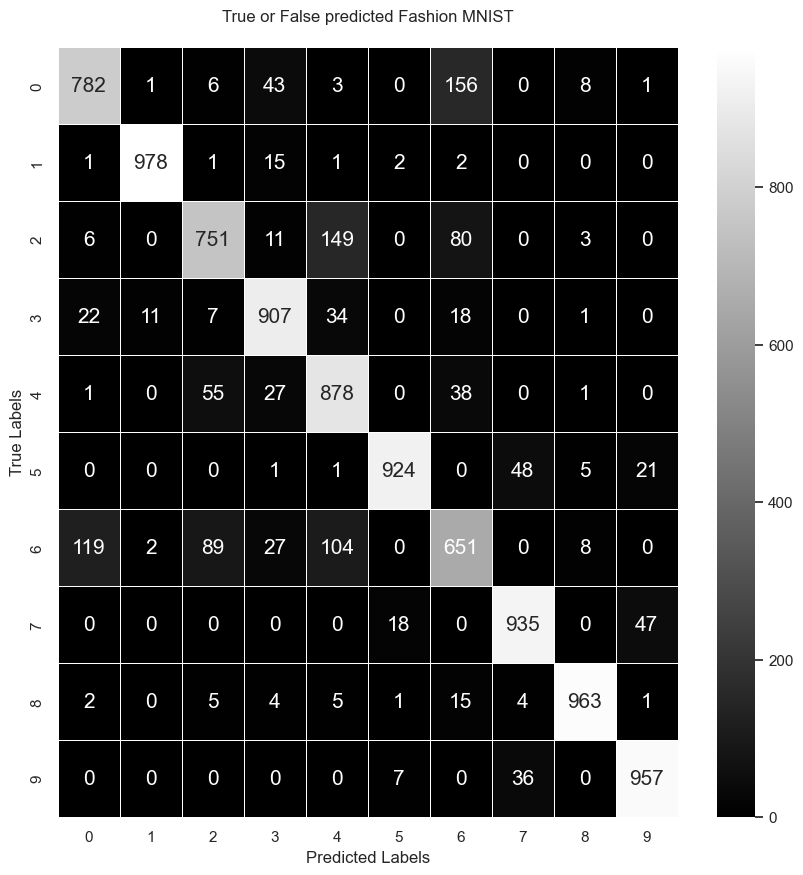

In [17]:
# Confusion matrix for Fashion MNIST
con_mat = confusion_matrix(y_test_fash_eval, y_predict_fash)

sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 10))
sns.heatmap(con_mat, annot=True, annot_kws={'size': 15}, linewidths=0.5, fmt="d", cmap="gray")
plt.title("True or False predicted Fashion MNIST\n")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test_fash_eval,y_predict_fash))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1000
           1       0.99      0.98      0.98      1000
           2       0.82      0.75      0.78      1000
           3       0.88      0.91      0.89      1000
           4       0.75      0.88      0.81      1000
           5       0.97      0.92      0.95      1000
           6       0.68      0.65      0.66      1000
           7       0.91      0.94      0.92      1000
           8       0.97      0.96      0.97      1000
           9       0.93      0.96      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [19]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


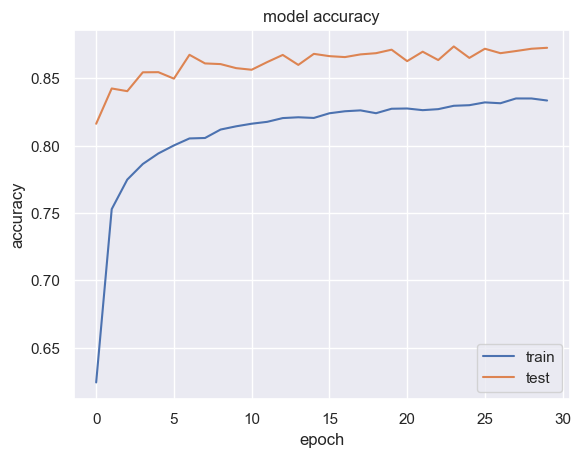

In [20]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

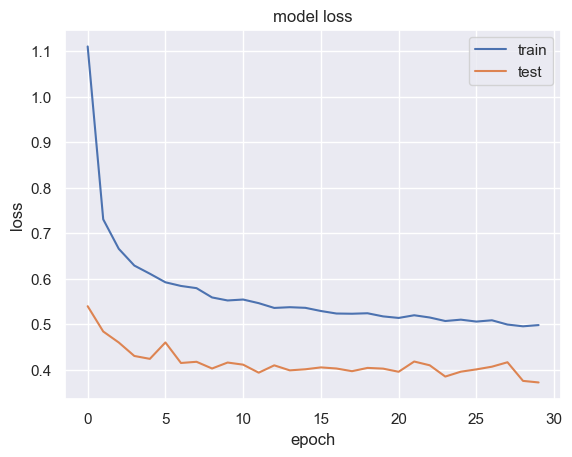

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [22]:
#tf.expand_dims(X_test_fashion[0])
y_predict = model.predict(X_test_fashion.loc[[0],:].values)
y_predict=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_fash_eval=np.argmax(y_test_fashion, axis=1)

1/1 [==============================] - 0s 80ms/step


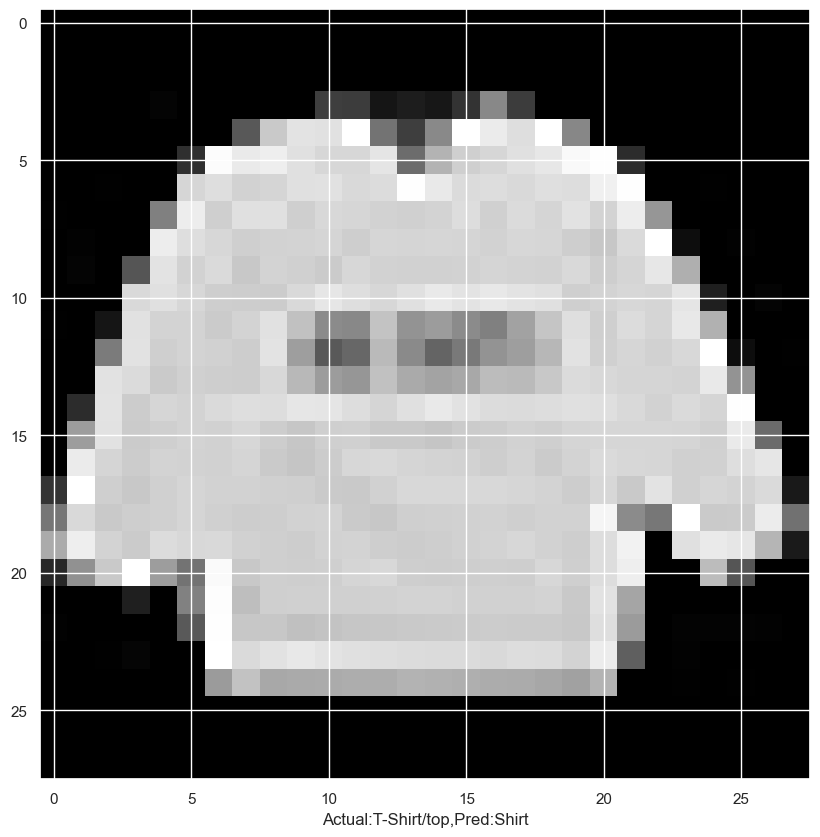

In [23]:
# Names of clothing accessories in order 
col_name = ['T-Shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

# Visualizing the first image from the test set
plt.figure(figsize=(10, 10))
plt.imshow(x_train_reshape[0], cmap='gray')  # Display the first image
plt.xlabel("Actual:{},Pred:{}".format(col_name[np.argmax(y_test_fashion[0])],col_name[y_predict[0]]))
plt.show()